In [3]:
# Load the data
import pandas as pd
df = pd.read_csv("/Users/sara/projects/smba/data/raw/genai_data.csv")
print("Data loaded successfully.")
print(df.shape)

Data loaded successfully.
(119, 32)


In [4]:
df.head()

,Timestamp,Are currently employed?,What industry do you work in?,What is your current role or job title?,How many years of professional experience do you have?,Are there any Gen AI tools approved by your organization?,"Do you use any generative AI tools for professional tasks? (e.g., ChatGPT, Copilot, Google Gemini, Claude)",Which Gen AI tool do you use?,How frequently do you use GenAI tools in your professional tasks?,Gen AI tools are very important for my professional tasks,...,"Considering my relationship with Gen AI, it has become something I often rely on.",I feel more confident making decisions at work when I use GenAI,I know how to use GenAI tools to improve the quality of my work related tasks.,My peers at work approve my use of Gen AI.,My manager at work supports my use of Gen AI.,People around me don't show disapproval regarding the use of Gen AI at work,What is your age group?,What is your gender?,What is your highest level of education completed?,What is your country of residence?
0,6/22/2025 15:42:10,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,3.0,3.0,4.0,5.0,5.0,5.0,62,Male,Bachelor’s degree,Brazil
1,6/22/2025 16:05:30,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,1.0,2.0,4.0,5.0,5.0,5.0,26-35,Female,Bachelor’s degree,Brazil
2,6/22/2025 12:00:17,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,4.0,4.0,4.0,4.0,3.0,3.0,18-25,Male,Master’s degree,Canada
3,6/22/2025 16:35:59,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,4.0,4.0,5.0,3.0,2.0,2.0,26-35,Female,Bachelor’s degree,Canada
4,6/22/2025 15:00:59,Yes,Creative / Media,Marketing manager,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,1.0,...,5.0,4.0,5.0,5.0,1.0,4.0,26-35,Male,Bachelor’s degree,Egypt


In [5]:
# Strip the column names
df.columns = df.columns.str.strip()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]



In [6]:
# Column Renaming
column_mapping = {
    'Timestamp': 'Timestamp',
    'Are currently employed?': 'employment_status',
    'What industry do you work in?': 'industry',
    'What is your current role or job title?': 'current_role',
    'How many years of professional experience do you have?': 'years_of_experience',
    'Are there any Gen AI tools approved by your organization?': 'genai_org_approval',
    'Do you use any generative AI tools for professional tasks? (e.g., ChatGPT, Copilot, Google Gemini, Claude)': 'genai_use',
    'Which Gen AI tool do you use?': 'genai_tools_used',
    'How frequently do you use GenAI tools in your professional tasks?': 'genai_frequency_use',
    'Gen AI tools are very important for my professional tasks': 'genai_importance',
    'Integrate Gen AI with other technologies related to it.': 'skill_integration',
    'Learn to use unfamiliar Gen AI tools.': 'skill_learning',
    'Use Gen AI for simple tasks.': 'simple_tasks_skills',
    'Use Gen AI for complex tasks.': 'complex_tasks_skills',
    'Become skillful using Gen AI.': 'skillfullness',
    'Find support for problems that are beyond my abilities to solve using Gen AI.': 'skills_support',
    'Show people around me how to use it.': 'skill_sharing',
    'I am a better worker with the use of Gen AI.': 'better_worker',
    'I feel personally connected to the Gen AI tools I use in my work.': 'relatedness',
    'Please describe two or three work-related tasks you used Gen AI for.': 'tasks_description',
    'How does it make you feel to report that you used Gen AI for work-related tasks?': 'emotional_energy',
    'I often find myself turning to GenAI as my first step in tackling professional problems.': 'dependancy',
    'Considering my relationship with Gen AI, it has become something I often rely on.': 'reliance',
    'I feel more confident making decisions at work when I use GenAI': 'decision_making_confidence',
    'I know how to use GenAI tools to improve the quality of my work related tasks.': 'quality_improvement',
    'My peers at work approve my use of Gen AI.': 'peers_approval',
    'My manager at work supports my use of Gen AI.': 'manager_support',
    'People around me don\'t show disapproval regarding the use of Gen AI at work': 'general_disapproval',
    'What is your age group?': 'age_group',
    'What is your gender?': 'gender',
    'What is your highest level of education completed?': 'highest_level_of_education',
    'What is your country of residence?': 'country_of_residence', 
}

df.rename(columns=column_mapping, inplace=True)
print("\nColumns renamed.")

# save the cleaned DataFrame to a new CSV file

print("Cleaned data saved to 'cleaned_genai_data.csv'.")


Columns renamed.
Cleaned data saved to 'cleaned_genai_data.csv'.


In [7]:
# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)
df.shape

(119, 31)

In [8]:
# Filter only employed users
df_employed = df[df['employment_status'] == 'Yes']
print("After keeping only employed:", df_employed.shape)
# Filter only GenAI users
df_filtered = df[df['genai_use'] == 'Yes']
print("After keeping employed & GenAI users:", df_filtered.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

print(df_employed.shape)
print(df_filtered.shape)


After keeping only employed: (113, 31)
After keeping employed & GenAI users: (105, 31)
(113, 31)
(105, 31)


In [9]:
df.to_csv('/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv', index=True)
print("Final cleaned data saved to 'final_cleaned_genai_data.csv'.")


Final cleaned data saved to 'final_cleaned_genai_data.csv'.


In [10]:
#Thematic analysis of the text columns
tasks_text = df['tasks_description'].dropna().tolist()
emotions_text = df['emotional_energy'].dropna().tolist()



Task Theme Frequencies:
Coding support: 47
Content creation: 38
Research support: 16
Idea generation: 11
Administrative tasks: 10
Data analysis: 9
Customer communication: 8
Strategic planning: 6
Process automation: 6
Translation & language support: 5
Market & competitive analysis: 5
Math & calculations: 5
HR & people support: 4
Presentation creation: 4
Data entry & management: 4
Design assistance: 3
Medical & healthcare tasks: 3
Marketing & SEO support: 2
Education: 2
Learning support: 2
Summarization: 1
Fleet management: 1
Other: 1


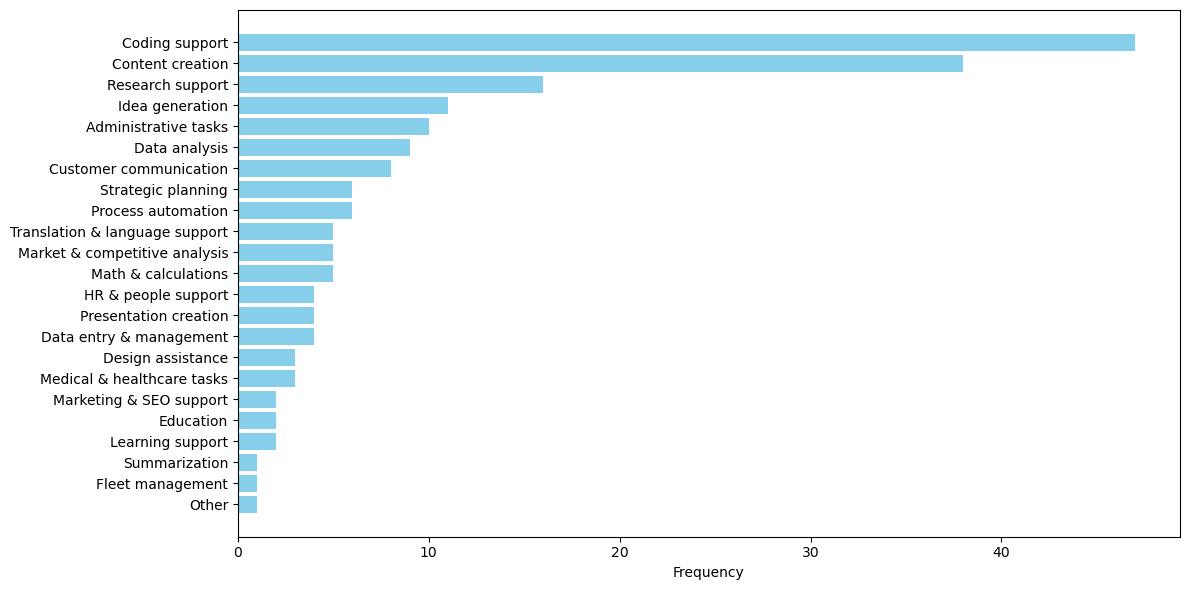

Figure saved as 'task_theme_frequency.png'.


In [11]:
from collections import Counter
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv")

# Extract the task description column
tasks_text = df['tasks_description'].dropna().tolist()

suggested_codes = []

for text in tasks_text: 
    codes = []
    text_lower = text.lower()
    text_clean = text_lower.translate(str.maketrans('', '', string.punctuation))

    if any(word in text_lower for word in ['write', 'draft', 'report', 'content', 'email', 'copy']):
        codes.append('Content creation')
    if any(word in text_lower for word in ['code', 'debug', 'script', 'complex products', 'apps', 'troubleshooting', 'coding', 'testing', 'technical']):
        codes.append('Coding support')
    if any(word in text_lower for word in ['analy', 'data', 'insight', 'metrics', 'dashboard', 'sheets']):
        codes.append('Data analysis')
    if any(word in text_lower for word in ['idea', 'brainstorm', 'concept']):
        codes.append('Idea generation')
    if any(word in text_lower for word in ['admin', 'schedule', 'basic tasks', 'summary', 'documentation', 'minutes', 'letters.', 'projekt']):
        codes.append('Administrative tasks')
    if any(word in text_lower for word in ['design', 'visual', 'graphic', 'mockup', 'banner']):
        codes.append('Design assistance')
    if any(word in text_lower for word in ['customer', 'client', 'proposal', 'communication', 'support', 'feedback']):
        codes.append('Customer communication')
    if any(word in text_lower for word in ['translate', 'translation', 'language', 'localization']):
        codes.append('Translation & language support')
    if any(word in text_lower for word in ['presentation', 'slides', 'deck', 'pitch', 'webinar']):
        codes.append('Presentation creation')
    if any(word in text_lower for word in ['learn', 'training', 'tutorial', 'course', 'coaching']):
        codes.append('Learning support')
    if any(word in text_lower for word in ['research', 'literature', 'review', 'survey', 'library', 'terminologies', 'google search', 'questions']):
        codes.append('Research support')
    if any(word in text_lower for word in ['summarize', 'summary', 'recap', 'digest']):
        codes.append('Summarization')
    if any(word in text_lower for word in ['automation', 'automate', 'workflow', 'macro']):
        codes.append('Process automation')
    if any(word in text_lower for word in ['strategy', 'plan', 'roadmap']):
        codes.append('Strategic planning')
    if any(word in text_lower for word in ['seo', 'optimization', 'ads', 'campaign']):
        codes.append('Marketing & SEO support')
    if any(word in text_lower for word in ['compliance', 'policy', 'regulation']):
        codes.append('Compliance & policy tasks')
    if any(word in text_lower for word in ['hr', 'recruitment', 'onboarding', 'hiring']):
        codes.append('HR & people support')
    if any(word in text_lower for word in ['competitive', 'benchmark', 'market']):
        codes.append('Market & competitive analysis')
    if any(word in text_lower for word in ['budget', 'finance', 'forecast']):
        codes.append('Finance & budgeting tasks')
    if any(word in text_lower for word in ['equation', 'estimate', 'calculation', 'math', 'formula', 'logic']):
        codes.append('Math & calculations')
    if any(word in text_lower for word in ['dryg', 'drug', 'patient', 'dosage', 'diagnosis']):
        codes.append('Medical & healthcare tasks')
    if any(word in text_lower for word in ['sql', 'queries']):
        codes.append('Data entry & management')
    if any(word in text_lower for word in ['homework', 'lessons', 'students']):
        codes.append('Education')
    if any(word in text_lower for word in ['fleet', 'telematics']):
        codes.append('Fleet management')
    if any(word in text_clean for word in ['script', 'scripts', 'scipst']):
        codes.append('Coding support')
    if any(word in text_clean for word in ['projekt', 'facharbeit']):
        codes.append('Administrative tasks')
    if any(word in text_clean for word in ['hilfe', 'benutzt']):
        codes.append('Administrative tasks')
    if any(arabic_word in text for arabic_word in ['يساعدني', 'حياتي', 'العلمي']):
        codes.append('Other')

    #if not codes:  # Default to Other
        #codes.append('Other')

    suggested_codes.append(codes)

# Flatten and count
all_codes = [code for sublist in suggested_codes for code in sublist]
code_counts = Counter(all_codes)

# Prepare placeholder list with NaNs
full_codes = [np.nan] * len(df)

# Get indices where tasks_description is not null
non_null_indices = df[df['tasks_description'].notnull()].index.tolist()

# Fill codes only for non-null rows
for idx, codes in zip(non_null_indices, suggested_codes):
    full_codes[idx] = '; '.join(codes)

# Add to DataFrame
df['all_codes'] = full_codes

# Sort: frequency first, "Other" last
themes_sorted = sorted(code_counts.keys(), key=lambda x: (x == "Other", -code_counts[x]))
counts_sorted = [code_counts[theme] for theme in themes_sorted]
print("\nTask Theme Frequencies:")
for theme, count in zip(themes_sorted, counts_sorted):
    print(f"{theme}: {count}")
# Plot
plt.figure(figsize=(12, 6))
plt.barh(themes_sorted, counts_sorted, color='skyblue')
plt.xlabel("Frequency")
plt.title("")
plt.gca().invert_yaxis()  # Most frequent on top
plt.tight_layout()
plt.savefig("task_theme_frequency.png", dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'task_theme_frequency.png'.")


In [11]:
# Export "Other" responses
#other_responses = [tasks_text[i] for i, codes in enumerate(suggested_codes) if codes == ['Other']]
#other_df = pd.DataFrame({'Other responses': other_responses})
#other_df.to_csv('other_task_responses.csv', index=False)
#print("Other responses saved to 'other_task_responses.csv'.")

Figure saved as 'emotional_energy_themes.png'.
Code frequency:
Coding support: 47
Translation & language support: 5
Research support: 16
Content creation: 38
Strategic planning: 6
Market & competitive analysis: 5
Math & calculations: 5
Idea generation: 11
Design assistance: 3
Process automation: 6
Marketing & SEO support: 2
HR & people support: 4
Administrative tasks: 10
Education: 2
Presentation creation: 4
Data analysis: 9
Learning support: 2
Customer communication: 8
Data entry & management: 4
Medical & healthcare tasks: 3
Summarization: 1
Fleet management: 1
Other: 1


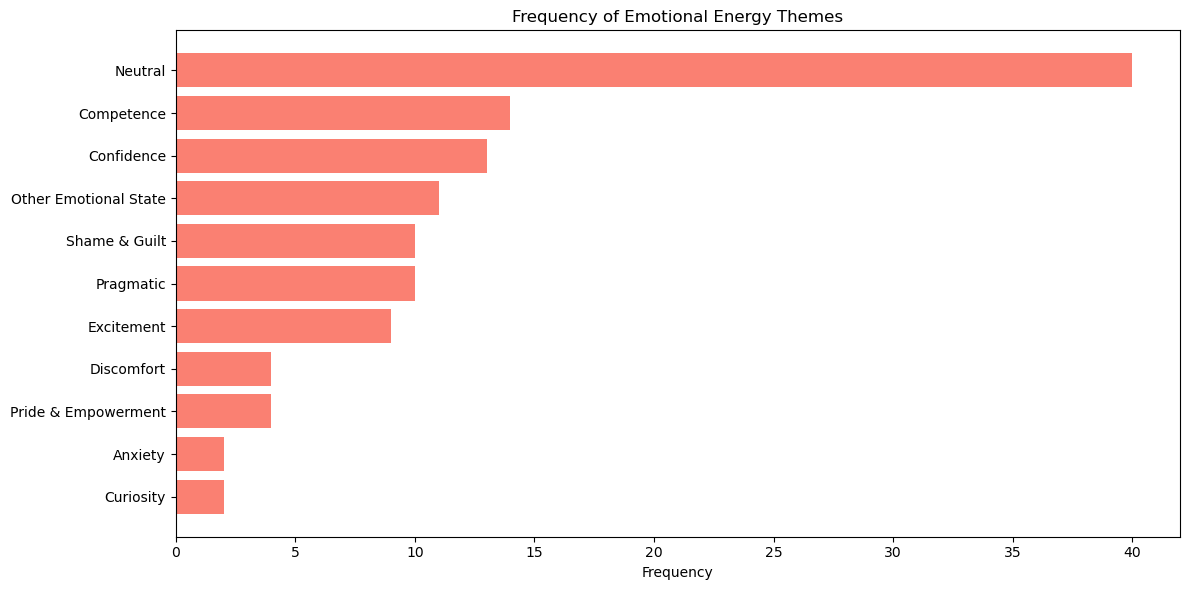

--- Thematic Analysis Results for Emotional Energy ---
Emotional Energy Theme Frequency:
Other Emotional State: 11
Shame & Guilt: 10
Neutral: 40
Pragmatic: 10
Competence: 14
Excitement: 9
Confidence: 13
Discomfort: 4
Anxiety: 2
Curiosity: 2
Pride & Empowerment: 4


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def perform_emotional_energy_analysis(df):
    """
    Performs thematic analysis on the 'emotional_energy' column of an already-filtered DataFrame,
    and saves a horizontal bar plot of theme frequencies.
    """

    # --- Preprocess text ---
    df['emotional_energy'] = (
        df['emotional_energy']
        .astype(str)
        .str.lower()
        .str.strip()
        .str.replace("i’m", "i am")
        .str.replace("it’s", "it is")
        .str.replace("can't", "cannot")
    )

    # --- Remove non-informative entries ---
    non_informative_strings = [
        '.', '', 'don’t know', 'yes', 'nan', 'nothing', 'none',
        'i don\'t know', 'na', 'cool', 'nice', 'rarely used ai for work related tasks.',
        'i don\'t report that', 'coding'
    ]
    df_for_analysis = df[~df['emotional_energy'].isin(non_informative_strings)].copy()

    # --- Extract texts for analysis ---
    emotional_text_series = df_for_analysis['emotional_energy'].dropna()
    emotional_text_indices = emotional_text_series.index.tolist()
    emotional_texts = emotional_text_series.tolist()

    # --- Thematic categorization ---
    suggested_emotional_codes = []
    for text in emotional_texts:
        codes = []

        # Confidence
        if any(word in text for word in ['confident', 'confidante', "i can do this", 'i am ok with that', 'trust', 'professional', "i'm the founder", 'knowledge']):
            codes.append('Confidence')

        # Competence
        if any(word in text for word in ['efficient', 'updated', 'up-to-date', 'tech-skilled', 'productive', 'improve', 'quality', 'accuracy', 'good and efficient', 'i can do this', 'better solutions']):
            codes.append('Competence')

        # Pragmatic
        if any(word in text for word in ['necessary', 'time saving', 'convenient', 'proofread', 'majority of the work', 'as long as it complies', 'technologies are bound', 'management pushing', 'modification not copy', 'supplementary', 'just a tool']):
            codes.append('Pragmatic')

        # Curiosity
        if any(word in text for word in ['curious', 'explore', 'discover', 'learning', 'interest']):
            codes.append('Curiosity')

        # Excitement
        if any(word in text for word in ['cool', 'nice', 'pretty good', 'great', 'happy for the help', 'supportive', 'empowering', 'excited', 'enjoy', 'love']):
            codes.append('Excitement')

        # Pride & Empowerment
        if any(word in text for word in ['proud', 'empowered', 'satisfaction', 'ownership', 'احس بفخر']):
            codes.append('Pride & Empowerment')

        # Shame & Guilt
        if any(word in text for word in ['shameful', 'cheating', 'not good', 'bad about myself', 'losing credit', 'hide', 'not so good']):
            codes.append('Shame & Guilt')

        # Anxiety
        if any(word in text for word in ['worry', 'question abilities', 'over-reliance']):
            codes.append('Anxiety')

        # Discomfort
        if any(word in text for word in ['uncomfortable', 'less comfortable', 'not great', 'not very good']):
            codes.append('Discomfort')

        # Fear
        if any(word in text for word in ['lose job', 'threat', 'afraid']):
            codes.append('Fear')

        # Neutral — after other categories assigned
        if any(word in text for word in ['neutral', 'okay', 'normal', 'fine', 'no problem', 'no big deal', 'indifferent', 'i feel ok', 'its okey', 'yes', 'good', 'na', 'i don’t know', 'it’s recommended']):
            codes.append('Neutral')

        if not codes:
            codes.append('Other Emotional State')

        suggested_emotional_codes.append(codes)

    # --- Add results to DataFrame ---
    df['emotional_energy_codes'] = [[] for _ in range(len(df))]
    codes_series = pd.Series(suggested_emotional_codes, index=emotional_text_indices)
    df.loc[emotional_text_indices, 'emotional_energy_codes'] = codes_series
    df['emotional_energy_codes_str'] = df['emotional_energy_codes'].apply(
        lambda x: '; '.join(x) if isinstance(x, list) and x else None
    )

    # --- Count frequencies ---
    all_codes_flat = [code for sublist in suggested_emotional_codes for code in sublist]
    emotional_code_counts = Counter(all_codes_flat)

    # --- Plot and save ---
    themes_sorted = [theme for theme, _ in sorted(emotional_code_counts.items(), key=lambda x: x[1], reverse=True)]
    counts_sorted = [count for _, count in sorted(emotional_code_counts.items(), key=lambda x: x[1], reverse=True)]

    plt.figure(figsize=(12, 6))
    plt.barh(themes_sorted, counts_sorted, color='salmon')
    plt.xlabel("Frequency")
    plt.title("Frequency of Emotional Energy Themes")
    plt.gca().invert_yaxis()  # Most frequent on top
    plt.tight_layout()
    plt.savefig("emotional_energy_themes.png", dpi=300, bbox_inches='tight')
    print("Figure saved as 'emotional_energy_themes.png'.")
    print("Code frequency:")
    for code, count in code_counts.items():
     print(f"{code}: {count}")
    plt.show()

    return df, emotional_code_counts


if __name__ == '__main__':

    updated_df_emotional, emotional_theme_counts = perform_emotional_energy_analysis(df)

    print("--- Thematic Analysis Results for Emotional Energy ---")
    print("Emotional Energy Theme Frequency:")
    for code, count in emotional_theme_counts.items():
        print(f"{code}: {count}")


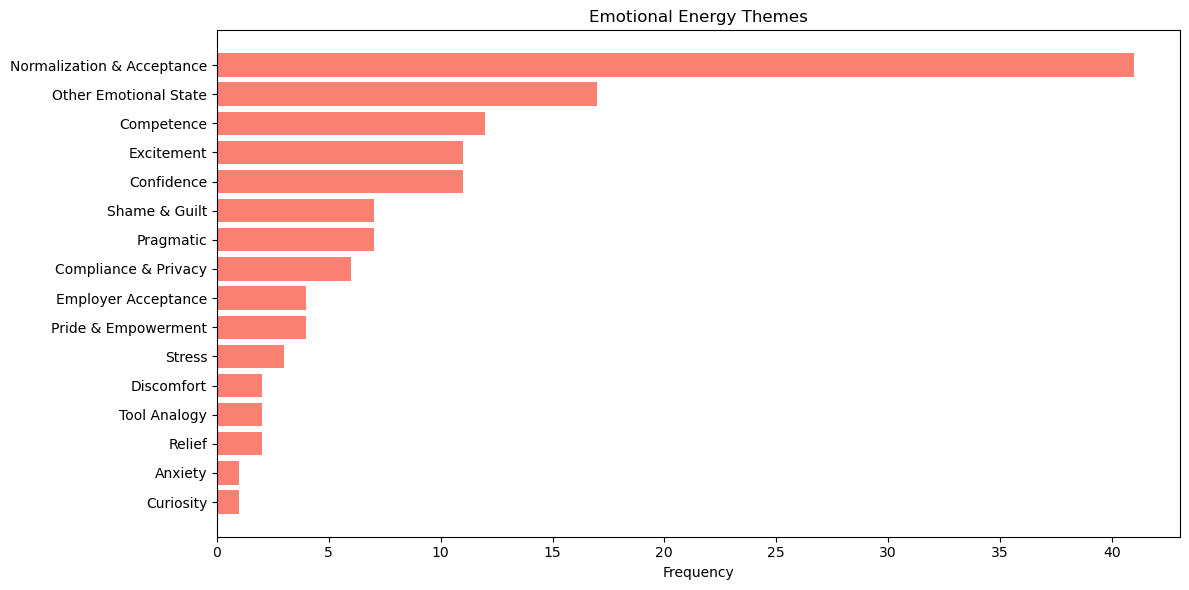

--- Thematic Analysis Results for Emotional Energy ---
Emotional Energy Theme Frequency:
Other Emotional State: 17
Normalization & Acceptance: 41
Shame & Guilt: 7
Pragmatic: 7
Competence: 12
Excitement: 11
Compliance & Privacy: 6
Confidence: 11
Discomfort: 2
Tool Analogy: 2
Employer Acceptance: 4
Stress: 3
Relief: 2
Anxiety: 1
Curiosity: 1
Pride & Empowerment: 4


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def perform_emotional_energy_analysis(df, print_other=False):
    """
    Performs thematic analysis on the 'emotional_energy' column,
    saves a bar plot of theme frequencies, and optionally prints responses
    tagged as 'Other Emotional State'.
    """

    # Preprocess text
    df['emotional_energy'] = (
        df['emotional_energy'].astype(str)
        .str.lower().str.strip()
        .str.replace("i’m", "i am")
        .str.replace("it’s", "it is")
        .str.replace("can't", "cannot")
    )

    # Remove non-informative entries
    non_info = ['.', '', 'don’t know', 'yes', 'nan', 'nothing', 'none',
                'i don\'t know', 'na', 'coding']
    df_clean = df[~df['emotional_energy'].isin(non_info)].copy()

    texts = df_clean['emotional_energy'].tolist()
    indices = df_clean.index.tolist()
    all_codes = []

    for txt in texts:
        codes = []
        # Confidence
        if any(k in txt for k in ['confident', 'i feel confident', 'trust', 'professional', "i'm the founder", 'knowledge']):
            codes.append('Confidence')
        # Competence
        if any(k in txt for k in ['efficient', 'updated', 'productive', 'quality', 'accuracy', 'better solutions']):
            codes.append('Competence')
        # Pragmatic
        if any(k in txt for k in ['necessary', 'time saving', 'convenient', 'proofread', 'shorten time', 'majority of the work', 'just a tool']):
            codes.append('Pragmatic')
        # Tool Analogy
        if any(k in txt for k in ['calculator', 'another tool']):
            codes.append('Tool Analogy')
        # Compliance & Privacy
        if any(k in txt for k in ['data protection', 'it complies', 'report']):
            codes.append('Compliance & Privacy')
        # Employer Acceptance
        if any(k in txt for k in ['employer', 'management', 'supervisor', 'organization encourages']):
            codes.append('Employer Acceptance')
        # Stress
        if any(k in txt for k in ['stress', 'stresses', 'worry', 'anxiety', 'stresses me', 'stresses']):
            codes.append('Stress')
        # Discomfort
        if any(k in txt for k in ['uncomfortable', 'less comfortable', 'not comfortable']):
            codes.append('Discomfort')
        # Shame & Guilt
        if any(k in txt for k in ['shame', 'shameful', 'cheat', 'hide it', 'bad about myself']):
            codes.append('Shame & Guilt')
        # Fear
        if any(k in txt for k in ['lose job', 'threat', 'afraid']):
            codes.append('Fear')
        # Curiosity
        if any(k in txt for k in ['curious', 'explore', 'discover', 'learning']):
            codes.append('Curiosity')
        # Excitement
        if any(k in txt for k in ['exciting', 'empowering', 'love', 'enjoy', 'great', 'happy', 'supportive', 'cool']):
            codes.append('Excitement')
        # Relief
        if any(k in txt for k in ['relieved', 'relief']):
            codes.append('Relief')
        # Pride & Empowerment
        if any(k in txt for k in ['proud', 'empowered', 'satisfaction', 'ownership', 'احس بفخر']):
            codes.append('Pride & Empowerment')
        # Normalization & Acceptance
        if any(k in txt for k in ['normal', 'fine by me', 'ok', 'its ok', 'no big deal', 'fine', 'indifferent','good', 'nice', 'helpful', 'support', 'useful']):
            codes.append('Normalization & Acceptance')
  
        # Specific long reflections
        if 'i don’t mind because i know i do the majority' in txt:
            codes.append('Pragmatic')
        if 'i feel confident in accomplishing tasks and relieved' in txt:
            codes.extend(['Confidence', 'Relief'])
        if 'unable to find an immediate answer' in txt or 'make sure about the resources' in txt:
            codes.append('Anxiety')

        # Fallback
        if not codes:
            codes.append('Other Emotional State')
        all_codes.append(codes)

    df_clean['themes'] = all_codes
    df_clean['themes_str'] = df_clean['themes'].apply(lambda x: '; '.join(x))

    # Frequency and plot
    flat = [c for sub in all_codes for c in sub]
    counts = Counter(flat)
    themes, freqs = zip(*counts.most_common())
    plt.figure(figsize=(12,6))
    plt.barh(themes, freqs, color='salmon')
    plt.gca().invert_yaxis()
    plt.xlabel('Frequency')
    plt.title('Emotional Energy Themes')
    plt.tight_layout()
    plt.savefig('emotional_energy_themes.png', dpi=300)
    plt.show()

    # Print 'Other Emotional State' if requested
    if print_other:
        others = df_clean[df_clean['themes'].apply(lambda lst: 'Other Emotional State' in lst)]
        print("\n--- Responses Tagged as 'Other Emotional State' ---")
        for r in others['emotional_energy']:
            print(f"- {r}")

    return df_clean, counts

if __name__ == '__main__':
    
    df_clean, theme_counts = perform_emotional_energy_analysis(df)
print("--- Thematic Analysis Results for Emotional Energy ---")
print("Emotional Energy Theme Frequency:")
for code, count in theme_counts.items():
    print(f"{code}: {count}")

In [14]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("/Users/sara/projects/smba/final_df_luisa.csv")

# Columns
pillars = ['dependence_score', 'relatedness_score', 'emotional_energy_score']
support_vars = ['manager_support', 'peers_approval']

# --- Step 1: Correlation Analysis ---
correlation_matrix = df[pillars + support_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.loc[support_vars, pillars])

# --- Step 2: Multiple Regression for each pillar ---
for pillar in pillars:
    # Drop NaNs only for the relevant columns
    subset = df[support_vars + [pillar]].dropna()
    
    X = subset[support_vars]  # independent vars
    y = subset[pillar]        # dependent var
    X = sm.add_constant(X)    # add intercept
    
    model = sm.OLS(y, X).fit()
    print(f"\nRegression Results for {pillar.capitalize()}:")
    print(model.summary())



Correlation Matrix:
                 dependence_score  relatedness_score  emotional_energy_score
manager_support          0.150727           0.160561                0.429870
peers_approval           0.199424           0.180467                0.241046

Regression Results for Dependence_score:
                            OLS Regression Results                            
Dep. Variable:       dependence_score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.322
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.103
Time:                        04:31:20   Log-Likelihood:                -170.72
No. Observations:                 115   AIC:                             347.4
Df Residuals:                     112   BIC:                             355.7
Df Model:                           2                                     

In [15]:
import pandas as pd
import statsmodels.api as sm

# Convert genai_org_approval to binary: approval present or not
df['genai_approval_binary'] = df['genai_org_approval'].notnull().astype(int)

# Define variables
pillars = ['dependence_score', 'relatedness_score', 'emotional_energy_score']
support_vars = ['manager_support', 'peers_approval', 'genai_approval_binary']

# Correlation
corr_matrix = df[pillars + support_vars].corr()
print("\nCorrelation Matrix:")
print(corr_matrix.loc[support_vars, pillars])

# Regression
for pillar in pillars:
    X = df[support_vars]
    y = df[pillar]
    X = sm.add_constant(X)
    model = sm.OLS(y, X, missing='drop').fit()
    print(f"\nRegression Results for {pillar}:")
    print(model.summary())



Correlation Matrix:
                       dependence_score  relatedness_score  \
manager_support                0.150727           0.160561   
peers_approval                 0.199424           0.180467   
genai_approval_binary         -0.029106           0.059206   

                       emotional_energy_score  
manager_support                      0.429870  
peers_approval                       0.241046  
genai_approval_binary                0.208193  

Regression Results for dependence_score:
                            OLS Regression Results                            
Dep. Variable:       dependence_score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.744
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.162
Time:                        04:31:26   Log-Likelihood:                -170.41
No. Observations:     

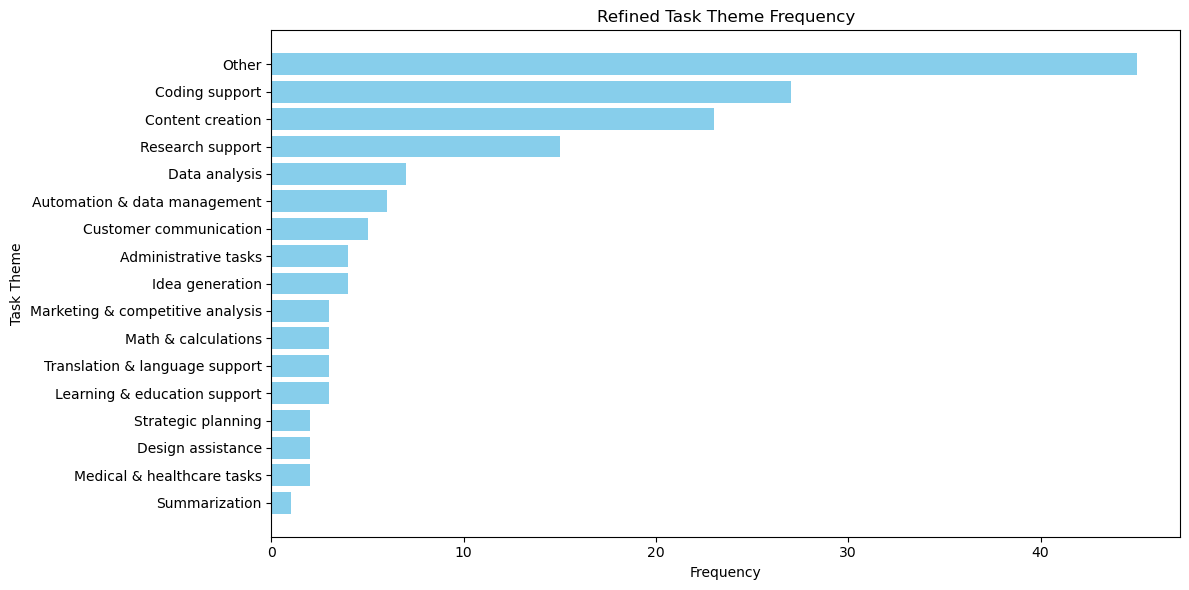

Classification complete.
Top categories: ['Other', 'Coding support', 'Content creation', 'Research support', 'Data analysis']
Saved plot as refined_task_theme_frequency.png and data as classified_tasks.csv


In [21]:
import pandas as pd
import string
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re

# ====== CONFIG ======
INPUT_FILE = "/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv"
OUTPUT_FILE = "classified_tasks.csv"
PLOT_FILE = "refined_task_theme_frequency.png"

# ====== CATEGORY KEYWORDS ======
category_keywords = {
    'Content creation': ['write','draft','report','content','email','copy','documentation','slides'],
    'Coding support': ['code','debug','script','app','troubleshoot','coding','technical','programming','sql','queries'],
    'Data analysis': ['analysis','data','insight','metrics','dashboard','analytics','database'],
    'Idea generation': ['idea','brainstorm','concept'],
    'Administrative tasks': ['admin','schedule','minutes','letter','summary','projekt','facharbeit','macro'],
    'Design assistance': ['design','visual','graphic','mockup','banner'],
    'Customer communication': ['client','customer','proposal','communication','feedback','pitch'],
    'Translation & language support': ['translate','translation','language','localization'],
    'Presentation creation': ['presentation','slides','deck','webinar'],
    'Learning & education support': ['learn','training','tutorial','course','coaching','homework','lessons','students'],
    'Research support': ['research','literature','review','survey','library','terminology','google search','questions','benchmark'],
    'Summarization': ['summarize','summary','recap','digest'],
    'Automation & data management': ['automation','automate','workflow','macro','data entry','database','excel','sheets'],
    'Strategic planning': ['strategy','plan','roadmap','goals'],
    'Marketing & competitive analysis': ['marketing','seo','ads','campaign','competitive','market','benchmark'],
    'HR & people support': ['hr','recruitment','onboarding','hiring'],
    'Math & calculations': ['equation','estimate','calculation','math','formula','logic'],
    'Medical & healthcare tasks': ['drug','patient','dosage','diagnosis']
}

# ====== FUNCTIONS ======
def normalize_text(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation))

def classify(text):
    if not isinstance(text, str) or not text.strip():
        return {'Other'}
    text_norm = normalize_text(text)
    codes = set()
    for category, keywords in category_keywords.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text_norm):
                codes.add(category)
                break
    return codes or {'Other'}

# ====== LOAD DATA ======
df = pd.read_csv(INPUT_FILE)

# ====== CLASSIFY ======
df['codes'] = df['tasks_description'].apply(classify)
df['codes_str'] = df['codes'].apply(lambda x: '; '.join(sorted(x)))

# ====== COUNT ======
all_codes_flat = [code for codes in df['codes'] for code in codes]
code_counts = Counter(all_codes_flat)

# ====== SORT with "Other" first ======
themes_sorted = sorted(code_counts.keys(), key=lambda x: (x != "Other", -code_counts[x]))
counts_sorted = [code_counts[theme] for theme in themes_sorted]

# ====== PLOT ======
plt.figure(figsize=(12, 6))
plt.barh(themes_sorted, counts_sorted, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Task Theme")
plt.title("Refined Task Theme Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(PLOT_FILE, dpi=300, bbox_inches='tight')
plt.show()

# ====== SAVE OUTPUT ======
df.to_csv(OUTPUT_FILE, index=False)

print("Classification complete.")
print(f"Top categories: {themes_sorted[:5]}")
print(f"Saved plot as {PLOT_FILE} and data as {OUTPUT_FILE}")


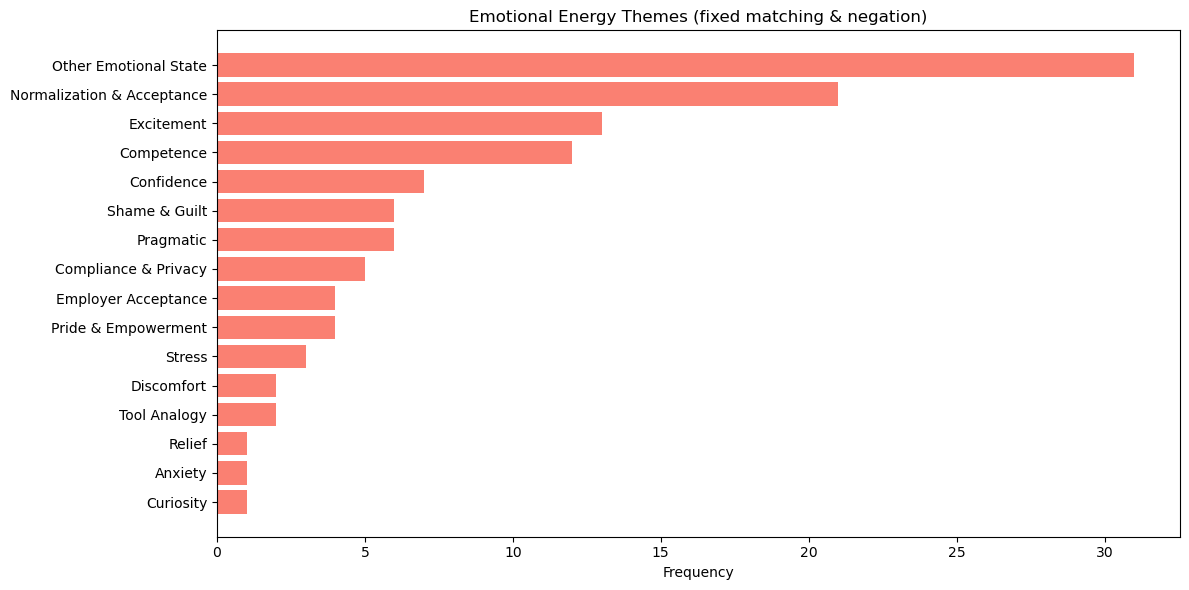


--- Emotional Energy Theme Frequency (fixed) ---
Normalization & Acceptance: 21
Other Emotional State: 31
Shame & Guilt: 6
Pragmatic: 6
Competence: 12
Excitement: 13
Compliance & Privacy: 5
Discomfort: 2
Tool Analogy: 2
Employer Acceptance: 4
Confidence: 7
Stress: 3
Relief: 1
Anxiety: 1
Curiosity: 1
Pride & Empowerment: 4


In [33]:
# -*- coding: utf-8 -*-
"""
Thematic analysis with over-classification fixes.
- Keeps your original 17 Emotional Energy themes
- Adds negation handling, word-boundary regex, safe keywording
- Plots bar chart in salmon
"""

import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ======================
# Generic helpers
# ======================

NEGATION_WORDS = r"(?:no|not|never|none|without|hardly|scarcely|less|isn['’]?t|aren['’]?t|wasn['’]?t|weren['’]?t|don['’]?t|doesn['’]?t|didn['’]?t|can['’]?t|cannot|won['’]?t|shouldn['’]?t)"
WS = r"(?:\W+\w+){0,3}"  # up to 3 tokens between negator and keyword (loose window)

def _normalize_text(s: str) -> str:
    s = str(s).lower().strip()
    s = (s
         .replace("i’m", "i am")
         .replace("it’s", "it is")
         .replace("can't", "cannot")
         .replace("don’t", "don't"))
    return s

def _negated(text: str, kw_pattern: str) -> bool:
    """Is the keyword pattern negated within a short window before it?"""
    pat = re.compile(rf"{NEGATION_WORDS}{WS}{kw_pattern}", re.IGNORECASE)
    return bool(pat.search(text))

def _any(text: str, patterns, allow_negated=False) -> bool:
    """True if ANY regex in patterns matches (and not negated unless allowed)."""
    for p in patterns:
        rx = re.compile(p, re.IGNORECASE) if isinstance(p, str) else p
        if rx.search(text):
            if not allow_negated and _negated(text, p):
                continue
            return True
    return False

def _plot_counts(counts: Counter, title: str, out_path: Path | None = None):
    if not counts:
        return
    themes, freqs = zip(*counts.most_common())
    plt.figure(figsize=(12, 6))
    plt.barh(themes, freqs, color="salmon")  # changed to salmon
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    if out_path:
        plt.savefig(out_path, dpi=300)
    plt.show()

# ======================
# Emotional Energy (keeps your 17 themes)
# ======================

def perform_emotional_energy_analysis(df: pd.DataFrame,
                                      print_other: bool = False,
                                      save_plot: bool = True,
                                      plot_path: str | Path = "emotional_energy_themes_fixed.png"):
    df = df.copy()
    df['emotional_energy'] = df['emotional_energy'].astype(str).map(_normalize_text)

    non_info = {'.', '', 'don’t know', 'yes', 'nan', 'nothing', 'none',
                "i don't know", 'na', 'coding'}
    df_clean = df[~df['emotional_energy'].isin(non_info)].copy()

    # ----- Your 17 themes (regex with word boundaries & safer tokens) -----
    CONFIDENCE = [r"\bconfiden(t|ce)\b", r"\btrust\b", r"\bprofessional\b", r"\bknowledge(able)?\b",
                  r"\bi am the founder\b"]
    COMPETENCE = [r"\befficient\b", r"\bupdated\b", r"\bproductive\b",
                  r"\bquality\b", r"\baccuracy\b", r"\bbetter solutions?\b"]
    PRAGMATIC = [r"\bnecessary\b", r"\btime[- ]?saving\b", r"\bconvenient\b",
                 r"\bproofread\b", r"\bshorten (the )?time\b",
                 r"\bmajority of the work\b", r"\bjust a tool\b",
                 r"\bok as long as\b"]
    TOOL_ANALOGY = [r"\bcalculator\b", r"\banother tool\b"]
    COMPLIANCE_PRIV = [r"\bdata protection\b", r"\bit complies\b", r"\breport\b"]
    EMPLOYER = [r"\bemployer\b", r"\bmanagement\b", r"\bsupervisor\b", r"\borganization encourages\b"]
    STRESS = [r"\bstress(es|ed|)\b", r"\bworr(y|ies|ied)\b", r"\banxiet(y|ies)\b"]
    DISCOMFORT = [r"\buncomfortable\b", r"\bless comfortable\b", r"\bnot comfortable\b"]
    SHAME_GUILT = [r"\bshame(d|ful)?\b", r"\bcheat(ing)?\b", r"\bhide it\b", r"\bbad about myself\b",
                   r"\bashamed\b"]
    FEAR = [r"\blose (my|the)? ?job\b", r"\bthreat\b", r"\bafraid\b"]
    CURIOSITY = [r"\bcurious(ity)?\b", r"\bexplor(e|ing|ation)\b", r"\bdiscover(y|ing)?\b"]
    EXCITEMENT = [r"\bexciting\b", r"\bempower(ing|ed|ment)\b", r"\blove\b", r"\benjoy\b",
                  r"\bgreat\b", r"\bhappy\b", r"\bsupportive\b", r"\bcool\b"]
    RELIEF = [r"\brelieve(d)?\b", r"\brelief\b"]
    PRIDE = [r"\bproud\b", r"\bempowered\b", r"\bsatisfaction\b", r"\bownership\b", r"احس بفخر"]
    NORMALIZE = [r"\bnormal\b", r"\bfine\b", r"\bok(?:ay)?\b", r"\bits ok(?:ay)?\b",
                 r"\bno big deal\b", r"\bindifferent\b", r"\bneutral\b",
                 r"\bi am comfortable\b", r"\bcomfortable\b", r"\bi (do|don)['’]?t mind\b"]
    ANXIETY = [r"\bunable to find an immediate answer\b", r"\bmake sure about the resources\b",
               r"\banxious\b"]

    SPECIAL_NEGATIONS = [(re.compile(r"nothing to be ashamed of"), "Shame & Guilt")]

    theme_order = [
        ("Confidence", CONFIDENCE),
        ("Competence", COMPETENCE),
        ("Pragmatic", PRAGMATIC),
        ("Tool Analogy", TOOL_ANALOGY),
        ("Compliance & Privacy", COMPLIANCE_PRIV),
        ("Employer Acceptance", EMPLOYER),
        ("Stress", STRESS),
        ("Discomfort", DISCOMFORT),
        ("Shame & Guilt", SHAME_GUILT),
        ("Fear", FEAR),
        ("Curiosity", CURIOSITY),
        ("Excitement", EXCITEMENT),
        ("Relief", RELIEF),
        ("Pride & Empowerment", PRIDE),
        ("Normalization & Acceptance", NORMALIZE),
        ("Anxiety", ANXIETY),
    ]

    texts = df_clean['emotional_energy'].tolist()
    all_codes = []

    for txt in texts:
        cancelled = {theme for rx, theme in SPECIAL_NEGATIONS if rx.search(txt)}
        codes = []
        for theme, patterns in theme_order:
            if theme in cancelled:
                continue
            if _any(txt, patterns, allow_negated=False):
                codes.append(theme)

        if "i don’t mind because i know i do the majority" in txt:
            if "Pragmatic" not in codes:
                codes.append("Pragmatic")
        if "i feel confident in accomplishing tasks and relieved" in txt:
            if "Confidence" not in codes:
                codes.append("Confidence")
            if "Relief" not in codes:
                codes.append("Relief")
        if ("unable to find an immediate answer" in txt) or ("make sure about the resources" in txt):
            if "Anxiety" not in codes:
                codes.append("Anxiety")

        codes = list(dict.fromkeys(codes))
        if not codes:
            codes = ["Other Emotional State"]
        all_codes.append(codes)

    df_clean["emotional_energy_themes"] = all_codes
    df_clean["emotional_energy_themes_str"] = df_clean["emotional_energy_themes"].apply(lambda x: "; ".join(x))

    flat = [c for sub in all_codes for c in sub]
    counts = Counter(flat)

    if save_plot:
        _plot_counts(counts,
                     title="Emotional Energy Themes (fixed matching & negation)",
                     out_path=Path(plot_path))

    if print_other:
        others = df_clean[df_clean['emotional_energy_themes'].apply(lambda lst: 'Other Emotional State' in lst)]
        print("\n--- Responses Tagged as 'Other Emotional State' ---")
        for r in others['emotional_energy']:
            print(f"- {r}")

    return df_clean, counts

# ======================
# Example usage
# ======================

if __name__ == "__main__":
    csv_path = "/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv"  # adjust path
    df = pd.read_csv(csv_path)

    emo_df, emo_counts = perform_emotional_energy_analysis(
        df,
        print_other=False,
        save_plot=True,
        plot_path="emotional_energy_themes_fixed.png"
    )
    print("\n--- Emotional Energy Theme Frequency (fixed) ---")
    for code, count in emo_counts.items():
        print(f"{code}: {count}")
